In [1]:
!hostname
!pwd

oliva-titanrtx-2.csail.mit.edu
/data/vision/phillipi/akumar01/synthetic-mdps/src


In [2]:
# This is autoreload module code using jupyter magic
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
from tqdm.auto import tqdm
import glob
import matplotlib


In [4]:
from util import load_pkl, save_pkl
from compile_experiment import envs_mujoco, envs_procgen, envs_dm_control

In [5]:
data_dir = "~/synthetic-mdps-data/"
data_dir = os.path.expanduser(data_dir)

In [32]:
def smooth_signal(x, window=100):
    kernel = np.ones(window) / window
    # pad_width = window // 2
    # padded_signal = np.pad(x, pad_width, mode='edge')
    # return np.convolve(padded_signal, kernel, mode='valid')
    return np.convolve(x, kernel, mode='same')

def exponential_smoothing(x, alpha=0.9):
    smoothed_signal = np.zeros_like(x)
    smoothed_signal[0] = x[0]
    for t in range(1, len(x)):
        smoothed_signal[t] = (1-alpha) * x[t] + alpha * smoothed_signal[t-1]
    return smoothed_signal

  0%|          | 0/11 [00:00<?, ?it/s]

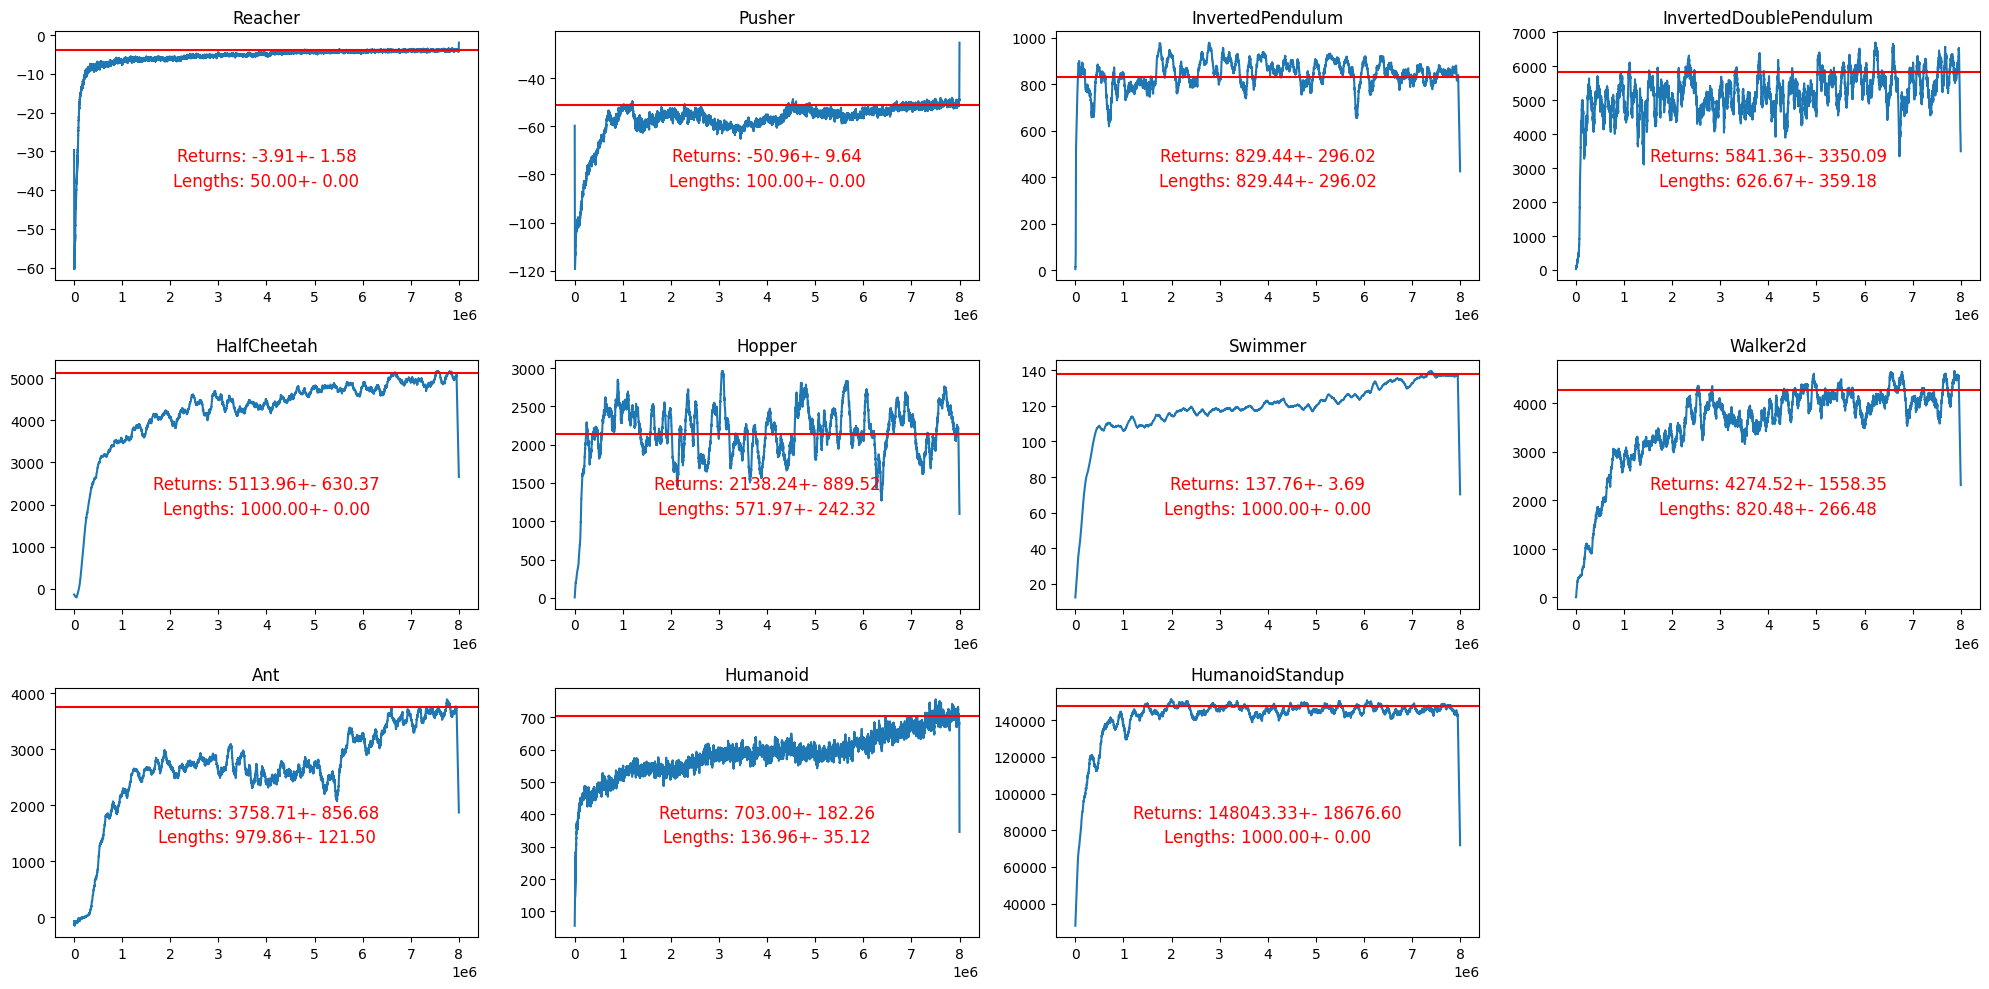

In [53]:
plt.figure(figsize=(20, 10))
for i, env in enumerate(tqdm(envs_mujoco)):
    plt.subplot(3, 4, i+1)
    stats = load_pkl(f"{data_dir}/datasets/mujoco/{env}", "train_stats")
    x = np.array(stats['global_step']).reshape(-1)
    y = np.array(stats['episode_return']).reshape(-1)
    y = smooth_signal(y, window=100)
    plt.plot(x, y)
    
    stats = load_pkl(f"{data_dir}/datasets/mujoco/{env}", "dataset_stats")
    returns = np.array(stats['episode_return']).reshape(-1)
    lengths = np.array(stats['episode_length']).reshape(-1)
    plt.text(0.5, 0.5, f"Returns: {np.mean(returns):.2f}+- {np.std(returns):.2f}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, c='r')
    plt.text(0.5, 0.4, f"Lengths: {np.mean(lengths):.2f}+- {np.std(lengths):.2f}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, c='r')
    plt.axhline(np.mean(returns), color='r')
    plt.title(env)
    
plt.tight_layout()
plt.show()

  0%|          | 0/49 [00:00<?, ?it/s]

Error in quadruped-escape


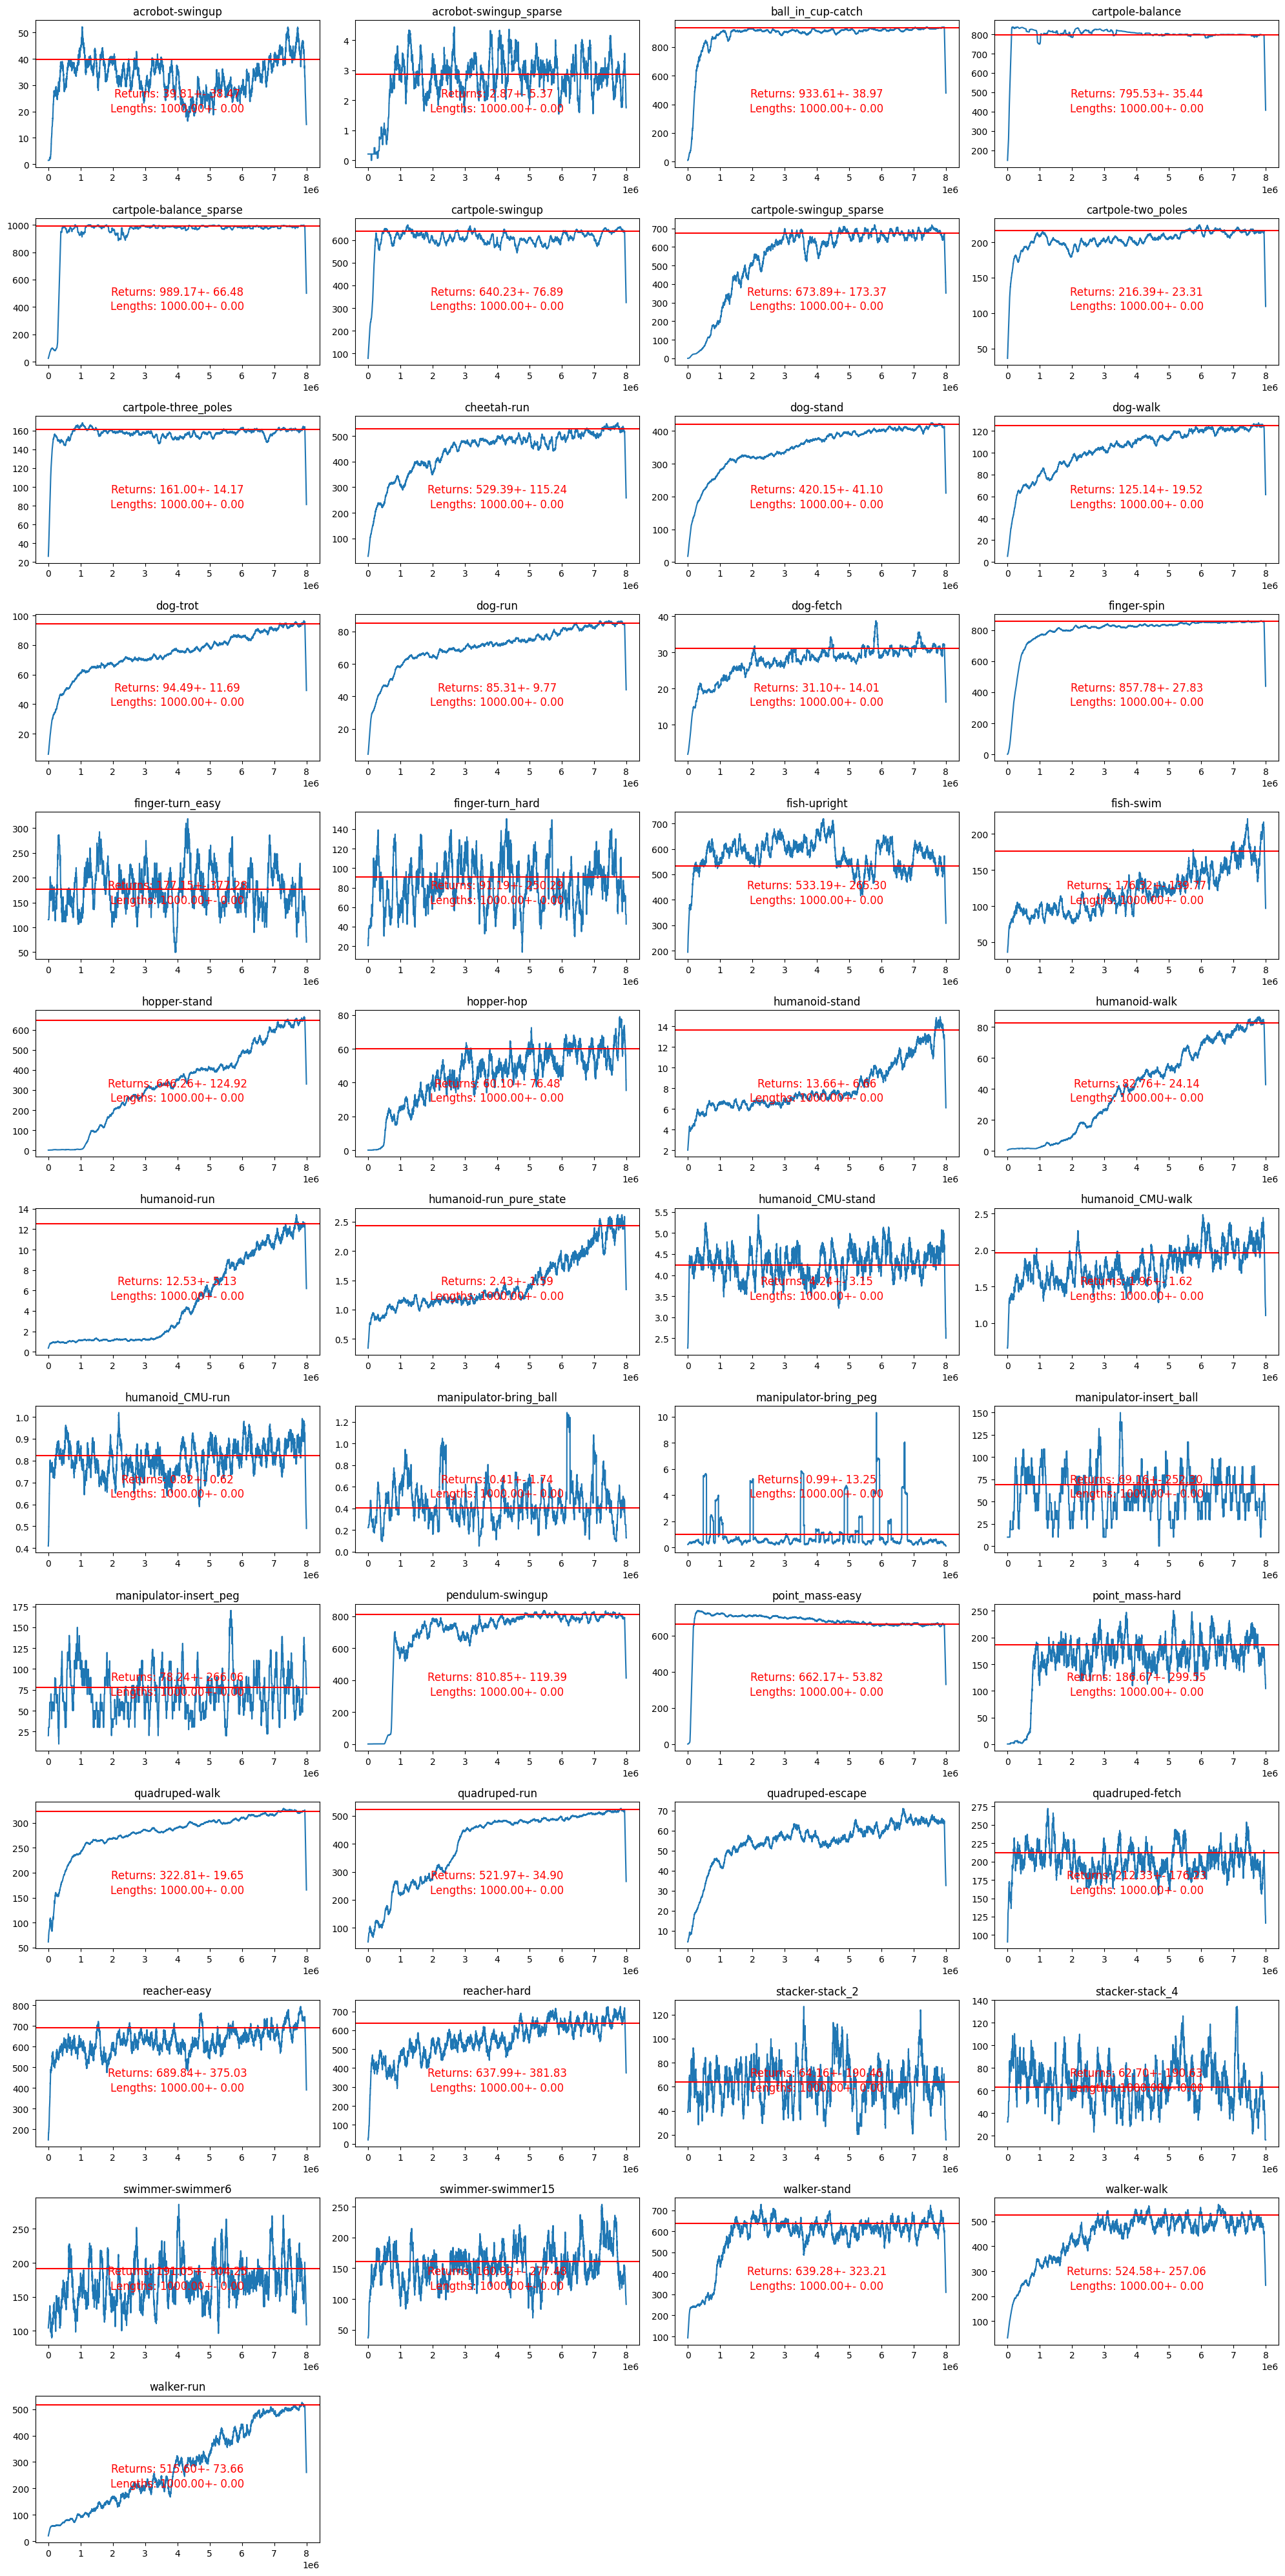

In [55]:
plt.figure(figsize=(20, 40))
for i, env in enumerate(tqdm(envs_dm_control)):
    plt.subplot(13, 4, i+1)
    stats = load_pkl(f"{data_dir}/datasets/dm_control/{env}", "train_stats")
    x = np.array(stats['global_step']).reshape(-1)
    y = np.array(stats['episode_return']).reshape(-1)
    y = smooth_signal(y, window=100)
    plt.plot(x, y)
    
    try:
        stats = load_pkl(f"{data_dir}/datasets/dm_control/{env}", "dataset_stats")
        returns = np.array(stats['episode_return']).reshape(-1)
        lengths = np.array(stats['episode_length']).reshape(-1)
        plt.text(0.5, 0.5, f"Returns: {np.mean(returns):.2f}+- {np.std(returns):.2f}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, c='r')
        plt.text(0.5, 0.4, f"Lengths: {np.mean(lengths):.2f}+- {np.std(lengths):.2f}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, c='r')
        plt.axhline(np.mean(returns), color='r')
    except:
        print(f"Error in {env}")
    
    plt.title(env)
    
    
plt.tight_layout()
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

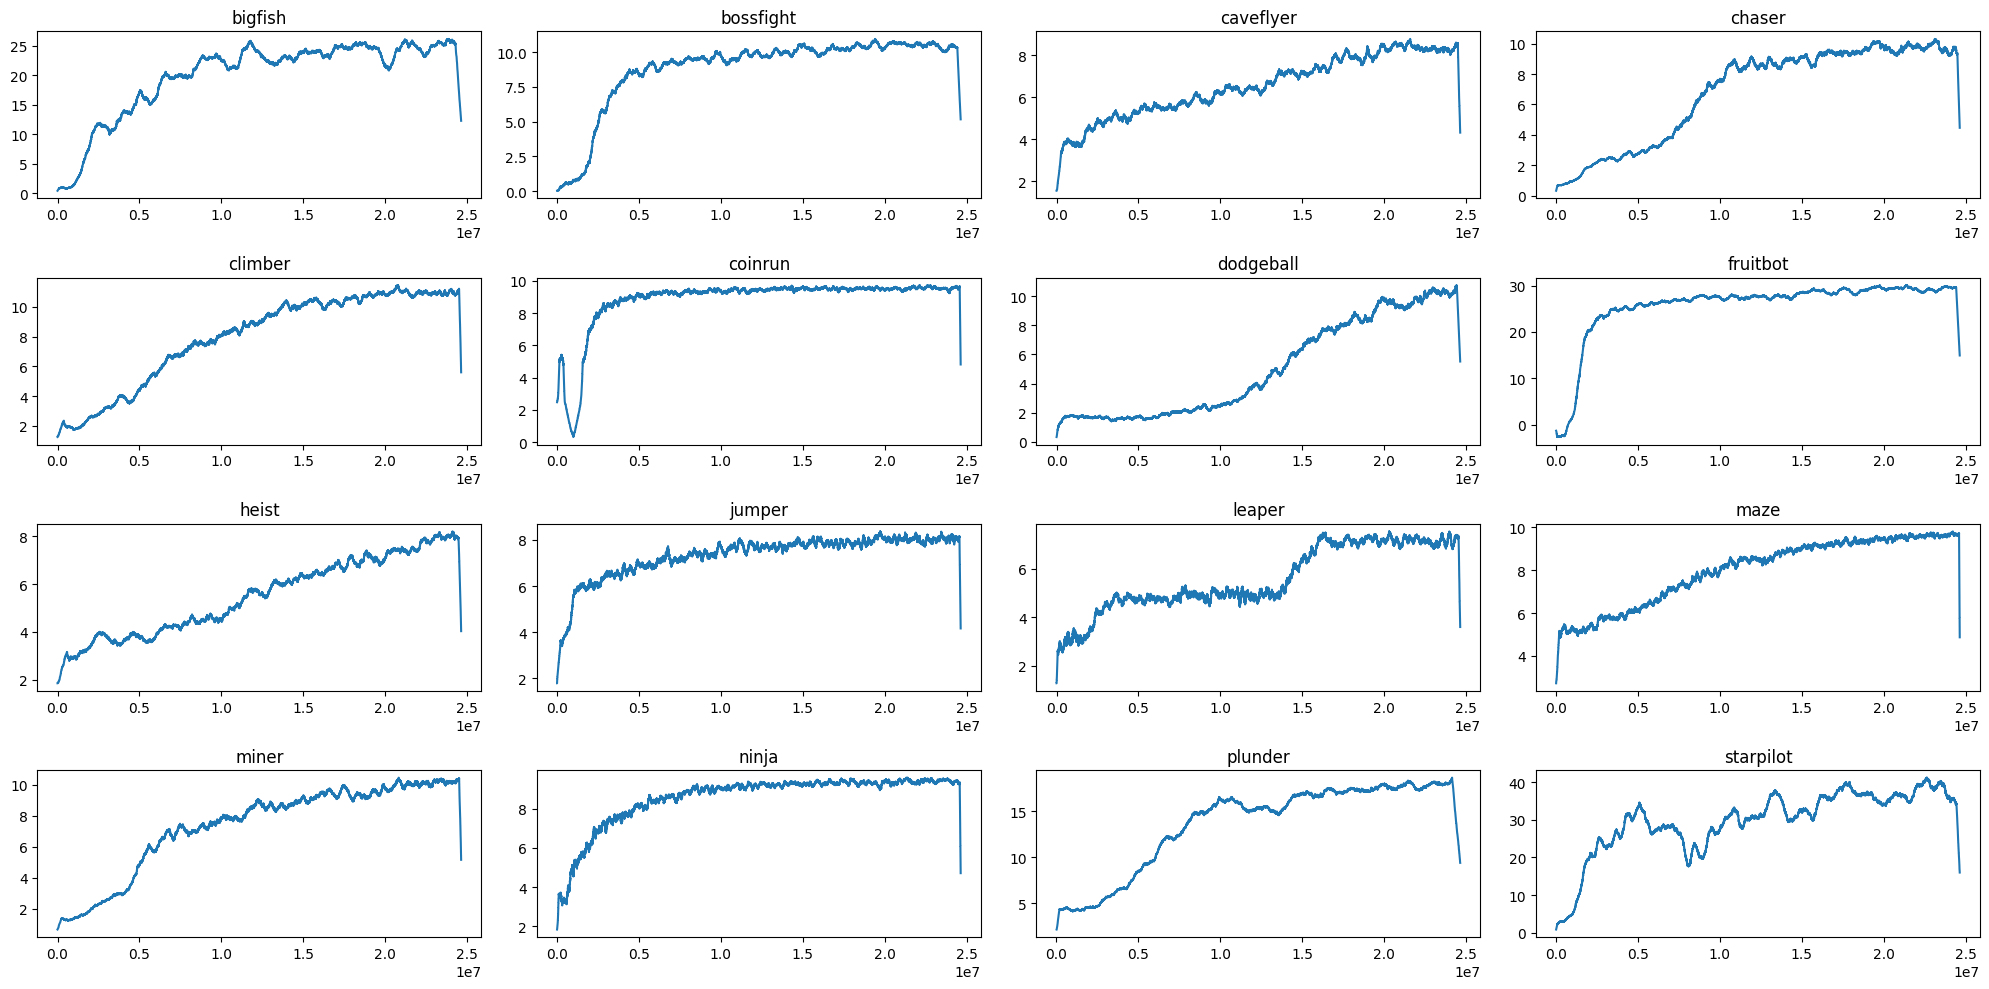

In [34]:
plt.figure(figsize=(20, 10))
for i, env in enumerate(tqdm(envs_procgen)):
    plt.subplot(4, 4, i+1)
    stats = load_pkl(f"{data_dir}/datasets/procgen/{env}", "train_stats")
    x = np.array(stats['global_step']).reshape(-1)
    y = np.array(stats['episode_return']).reshape(-1)
    y = smooth_signal(y, window=1000)
    plt.plot(x, y)
    # stats = load_pkl(f"{data_dir}/datasets/procgen/{env}", "dataset_stats")
    # plt.axhline(np.mean(stats['episode_return']), color='r')
    plt.title(env)
plt.tight_layout()
plt.show()
    

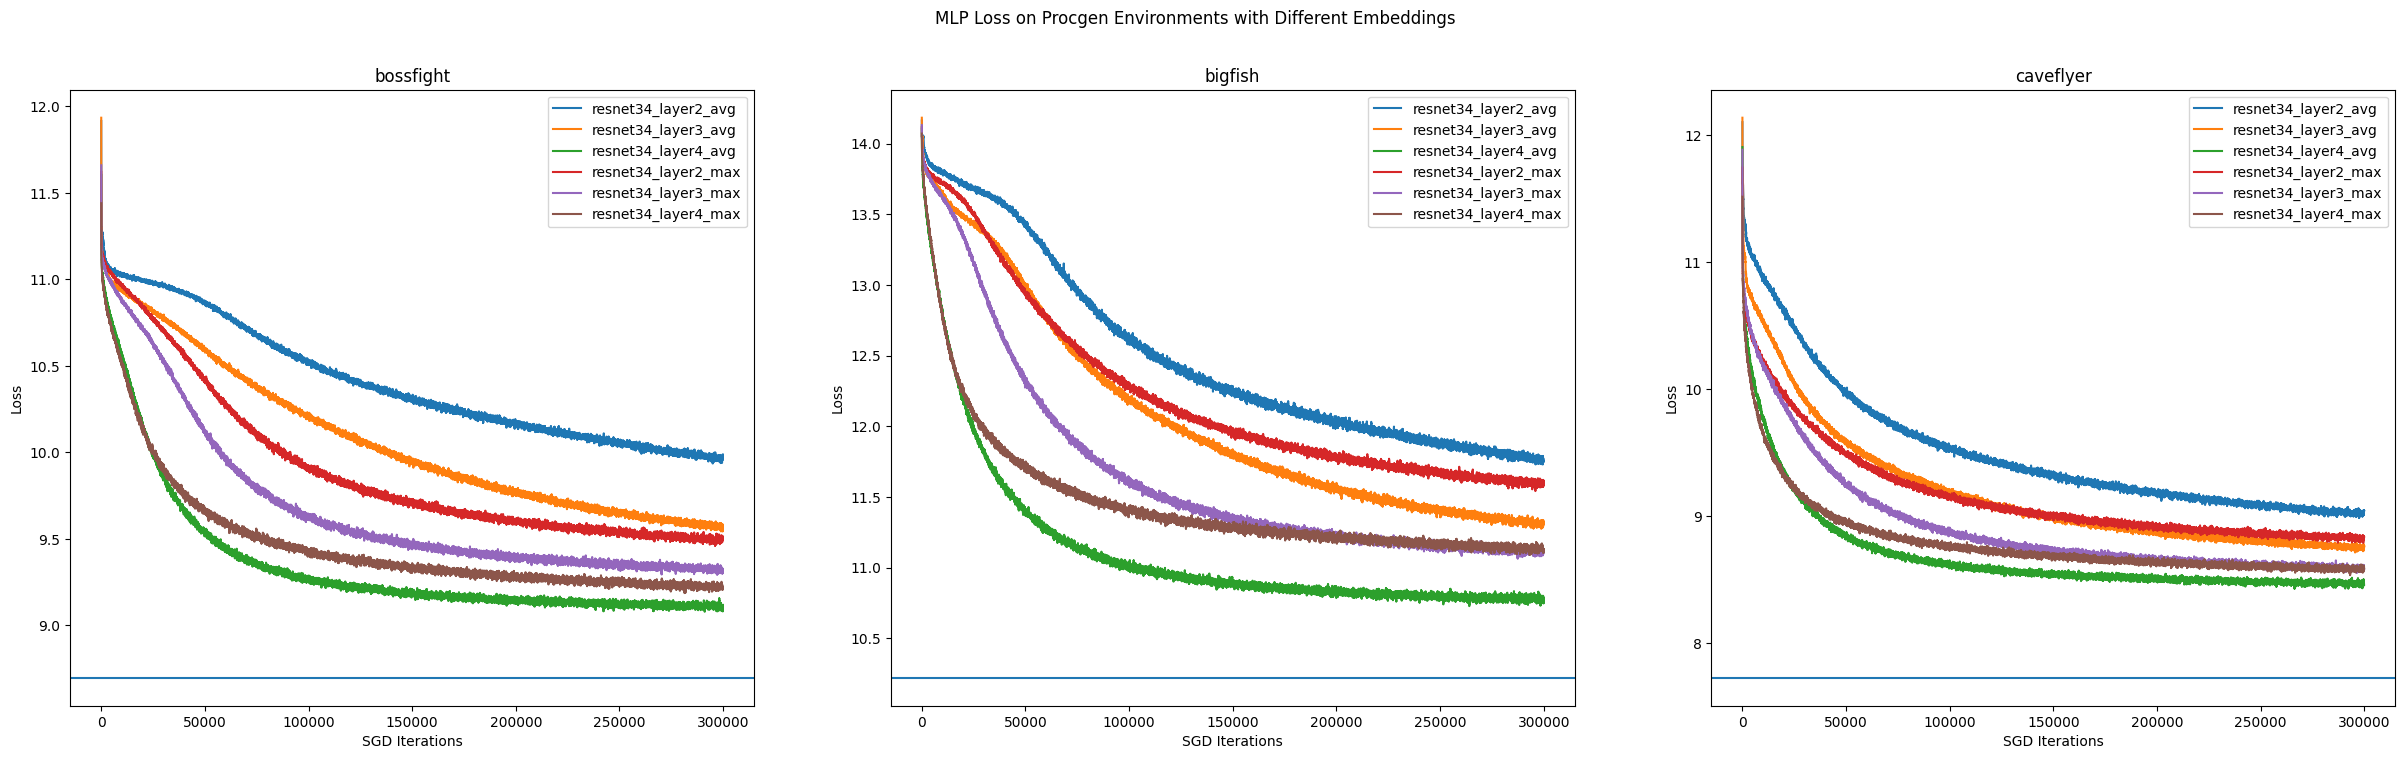

In [46]:
plt.figure(figsize=(30, 8))
for i, env_id in enumerate(['bossfight', 'bigfish', 'caveflyer']):
    plt.subplot(1, 3, i+1)
    for embed_name in ["resnet34_layer2_avg", "resnet34_layer3_avg", "resnet34_layer4_avg",
                       "resnet34_layer2_max", "resnet34_layer3_max", "resnet34_layer4_max"]:
        with open(f"/data/vision/phillipi/akumar01/synthetic-mdps-data/datasets_temp/procgen/{env_id}/{embed_name}/train_stats.pkl", "rb") as f:
            ts = pickle.load(f)
            y = ts['ce']/1024
            y = np.convolve(y, np.ones(100)/100, mode='valid')
            plt.plot(np.e**y, label=embed_name)
    plt.axhline(np.e**ts['entr_tar'].mean())
    plt.title(env_id)
    plt.ylabel("Loss")
    plt.xlabel("SGD Iterations")
    plt.legend()

plt.suptitle("MLP Loss on Procgen Environments with Different Embeddings")
plt.show()


In [7]:
from compile_experiment import envs_mujoco
import jax
import numpy as np

In [ ]:
for env_id in envs_mujoco:
    print(env_id)
    with open(f"/data/vision/phillipi/akumar01/synthetic-mdps-data/datasets/mujoco/{env_id}/dataset.pkl", "rb") as f:
        dataset = pickle.load(f)
    dataset = jax.tree_map(lambda x: x.astype(np.float32), dataset)
    with open(f"/data/vision/phillipi/akumar01/synthetic-mdps-data/datasets/mujoco/{env_id}/dataset.pkl", "wb") as f:
        pickle.dump(dataset, f)

Reacher
Pusher
InvertedPendulum
InvertedDoublePendulum
HalfCheetah
Hopper
Swimmer
Walker2d
Ant
Humanoid
